In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 4.  Evaluating model

three ways to evaluate Scikit-learn models / estimators

1. Estimator's `build-in score() methode `
2. The `scoring` parameter
3. Problem-specific metric function


Scikit-Learn implements 3 different methods of evaluating models.


*   The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
*   The scoring parameter. This parameter can be passed to methods such as `cross_val_score()` or `GridSearchCV()` to tell Scikit-Learn to use a specific type of scoring metric.
*  Problem-specific metric functions available in `sklearn.metrics`. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.


`yo have to write this documentation : `
* https://scikit-learn.org/stable/modules/model_evaluation.html


# 4-1 Evaluating a model with the `score()` method


In [2]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("/content/drive/MyDrive/ML_project/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# create Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create classifier model instance
clf = RandomForestClassifier()

# Instantiate Random Forest Classifier
clf.fit(X_train ,y_train)

# Evaluate the Rnadom Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

In [4]:
clf.score(X_train, y_train)


1.0

**Let's try using score in our Regression Models**

In [5]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# create Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create classifier model instance
model = RandomForestRegressor()

# Instantiate Random Forest Classifier
model.fit(X_train ,y_train)



RandomForestRegressor()

In [6]:
# Evaluate the Rnadom Forest Classifier
# the default score() evaluation metric is r_squared for regression algorithms
# highest =1.0 and lowest = 0.0
model.score(X_test, y_test)

0.5106393318965518

In [7]:
model.score(X_train, y_train)

0.924203269641995

# 4.2 Evaluating a model using the `scoring` parameter

`cross-Validation` to use 5 different versions of training data and evaluated on 5 different version of the test data .

 * https://scikit-learn.org/stable/modules/cross_validation.html


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# create Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create classifier model instance
clf = RandomForestClassifier()

clf.fit(X_train ,y_train)

RandomForestClassifier()

In [9]:
clf.score(X_test, y_test)

0.8524590163934426

In [10]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [11]:
np.random.seed(42)
# single traing and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of 5-fold croos-validation-score
clf_score_val_score = np.mean(cross_val_score(clf, X, y, cv=5))



# compare the two
clf_single_score, clf_score_val_score

(0.8524590163934426, 0.8248087431693989)

In [12]:
np.random.seed(42)
# single traing and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of 5-fold croos-validation-score
clf_score_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Calcul Accyracy
y_preds = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score =accuracy_score(y_test,y_preds)

# compare the tree
clf_single_score, clf_score_val_score , accuracy_score

(0.8524590163934426, 0.8248087431693989, 0.8524590163934426)

In [13]:
# default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [14]:
# scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# **4.2.1  Classification model evaluation metrics**

1. accuracy
2. Area under ROC cuvre
3. confusion matrix
4. classification report


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [16]:
np.mean(cross_val_score)

0.8215300546448088

In [17]:
print(f"Heart disease Classifier cross-validation Accuracy: {np.mean(cross_val_score)*100:.2f}%")
# print(f"The cross-validated accuracy is: {np.mean(cross_val_score)*100:.2f}%

Heart disease Classifier cross-validation Accuracy: 82.15%


**Area under the receiver operation characteristic cuvre (AUC/ROC)**

* Area under curve AUC
* ROC cuvre

ROC curves area a comparaison of a model's true positive rate (tpr) versus a models false positive rate(fpr)

* True positive = model predicts 1'when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1




https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

In [18]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
from sklearn.metrics import roc_curve

# Make prediction with probalities
y_preds = clf.predict_proba(X_test)

y_preds[:5]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91]])

In [20]:
y_proba_positive = y_preds[:,1]
y_proba_positive[:5]

array([0.11, 0.95, 0.9 , 0.21, 0.91])

In [21]:

# Calculate fpr , tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive)
# check to false posituve rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

In [22]:
tpr

array([0.        , 0.02857143, 0.05714286, 0.14285714, 0.25714286,
       0.31428571, 0.34285714, 0.4       , 0.42857143, 0.42857143,
       0.54285714, 0.65714286, 0.71428571, 0.71428571, 0.74285714,
       0.74285714, 0.77142857, 0.77142857, 0.8       , 0.8       ,
       0.82857143, 0.94285714, 0.97142857, 0.97142857, 0.97142857,
       0.97142857, 1.        , 1.        , 1.        , 1.        ])

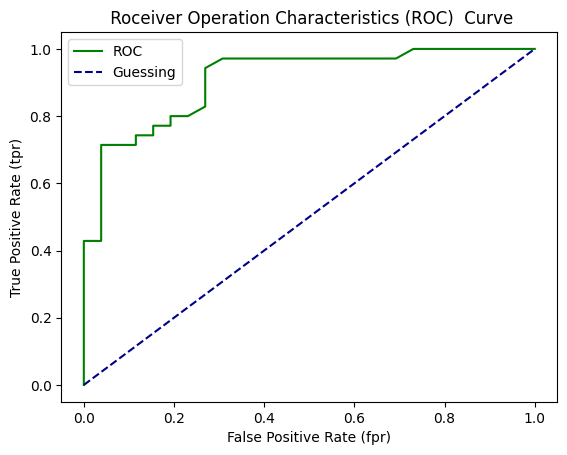

In [23]:
# create a function for plutting ROC function
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve give the flase positive rate (fpr) and true positive rate (tpr)
  of a model
  """
  # Plot roc curve
  plt.plot(fpr , tpr, color="green", label="ROC")
  # Random line
  plt.plot([0,1], [0,1], linestyle="--", color="darkblue", label="Guessing")
  # Customize the plot
  plt.xlabel("False Positive Rate (fpr)")
  plt.ylabel("True Positive Rate (tpr)")
  plt.title(" Roceiver Operation Characteristics (ROC)  Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

Ressource :
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
* https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
* https://www.youtube.com/watch?v=4jRBRDbJemM

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba_positive)

0.9093406593406593

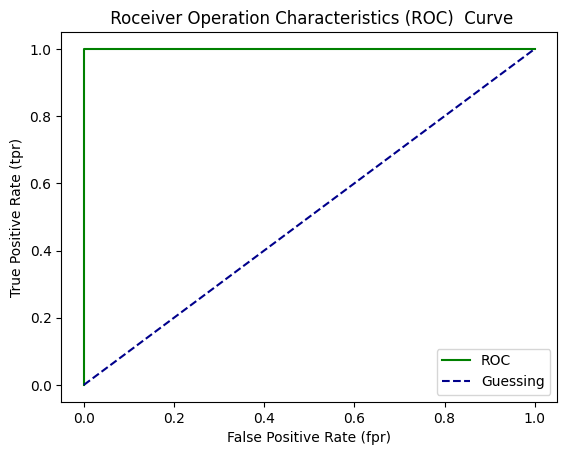

In [25]:
# plot perfect ROC score and UC score
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr, tpr)
#

In [26]:
# perfect AUC score is
roc_auc_score(y_test, y_test)


1.0

# **Confusion MATRIX**

A confusion matrix is a quick to compare the labels a model predicts and the actual labels it  was supposed to predict in essence , giving you an idea of where the model is getting confused

In [27]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]])

In [28]:
# Visualize confusion matrix with pd.crosstab
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,21,5
1,8,27


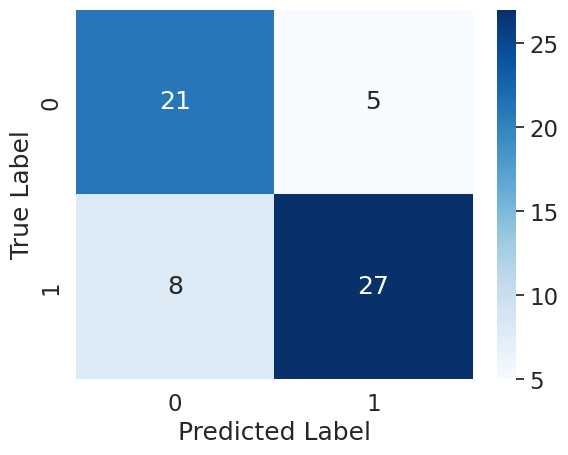

In [29]:
# make our confusion matrix more visual with seabron's heatmap()

import seaborn as sns
import matplotlib.pyplot as plt

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seabron
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Creating confusion matrix using Scikit-Learn
to use the new methods of creating a confusion matrix with Scikit-learn you will need version +1.0

In [30]:
import sklearn
sklearn.__version__

'1.3.2'

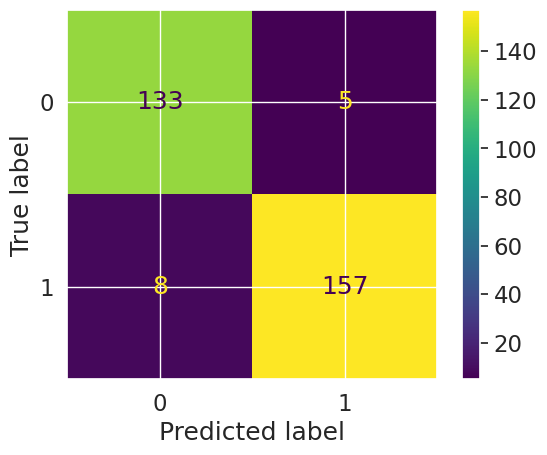

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X ,y=y)

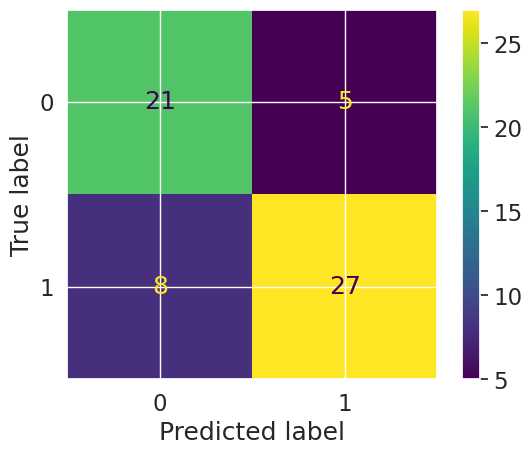

In [32]:

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

## Classification Reports

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [34]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* `Accuracy` is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* `Precision` and `recall` become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* `F1-score` is a combination of precision and recall.

# **4.2.2 Regression model evaluation metrics**

Model evaluation metrics documentation -
* https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**
* What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.


In [35]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [36]:
import pandas as pd
housing_df = pd.DataFrame(housing["data"]
                          , columns=housing["feature_names"]
                          )
# housing_df["target"] = pd.Series(housing["target"])
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [37]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [38]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
model.score(X_test, y_test)

0.8066196804802649

In [40]:
y_test[:5]

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000


In [41]:
y_test.mean()


2.0550030959302323

In [42]:
from sklearn.metrics import r2_score
#   fill an array with y_test mean
import numpy as np
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [43]:
r2_score(y_test, y_test_mean)

0.0

In [44]:
r2_score(y_test, y_test)

1.0

**MAE**
* mean absolute Error
MAE : is average of the absolute differences between predictions and actual values.
* it give you an idea how wron your models predictions are .

In [45]:
# MAE
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [46]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [47]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


In [48]:
df = pd.DataFrame(data={"actual values": y_test,
                      "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [49]:
# MAE using formiula and Differences
df['differences'].mean() , np.abs(df['differences']).mean()

(0.0121069218749996, 0.3265721842781009)

**MSE squared error**

 MSE is the mean of the square of the errors between actual and predicted Values.

In [50]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [51]:
df['square_differences'] = np.square(df['differences'])
df

,actual values,predicted values,differences,square_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [52]:
# calcule MS by hand
squared = np.square(df['differences'])
squared.mean()

0.2534073069137548

In [53]:
df_large_error = df.copy()

df_large_error.iloc[0]['square_differences'] = 16

In [54]:
df_large_error

,actual values,predicted values,differences,square_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [55]:
# Calcul MSE with large error
df_large_error['square_differences'].mean()

0.25728320720794084

In [56]:
df_large_error.iloc[1:100]= 20
df_large_error

,actual values,predicted values,differences,square_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [57]:
df_large_error['square_differences'].mean()

0.7333540351264799

# 4.2.3 finally using the `scoring` parameter

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)


# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)


In [59]:
import numpy as np
np.random.seed(42)
# Cross Validation Accuracy
# if scoring=None , estimators default scoring evaluation metric is used (accuracy for classification model)
cross_val=cross_val_score(clf, X, y, cv=5,scoring=None)
cross_val

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [60]:
# Cross-validation accuracy
print(f"Heart disease Classifier cross-validation Accuracy: {np.mean(cross_val)*100:.2f}%")

Heart disease Classifier cross-validation Accuracy: 82.48%


In [61]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [62]:
# Cross-validation accuracy
print(f"Heart disease Classifier cross-validation Accuracy: {np.mean(cross_val)*100:.2f}%")

Heart disease Classifier cross-validation Accuracy: 82.48%


In [63]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [64]:
# Cross-validation Precision
print(f"Heart disease Classifier cross-validation Pricision: {np.mean(cv_precision)*100:.2f}%")

Heart disease Classifier cross-validation Pricision: 83.30%


In [65]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [66]:
# Cross-validation Recall
print(f"Heart disease Classifier cross-validation Recall: {np.mean(cv_recall)*100:.2f}%")

Heart disease Classifier cross-validation Recall: 85.45%


let's see `scoring`  parameter using for rgression Problem

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

clf = RandomForestRegressor(n_estimators=100)

In [68]:
np.random.seed(42)
cv_r2 = cross_val_score(clf, X, y, cv=5,scoring=None)
cv_r2

array([0.51682354, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [69]:
np.mean(cv_r2)*100

65.21420895559876

In [74]:
# mean abssoulute error
np.random.seed(42)
cv_mae = cross_val_score(clf, X, y, cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-0.54255936, -0.40903449, -0.43716367, -0.46911343, -0.47319069])

In [75]:
np.mean(cv_mae)*100

-46.62123287693799

In [72]:
# mean squared error
mse = cross_val_score(clf, X, y, cv=5,scoring="neg_mean_squared_error")
mse

array([-0.51821856, -0.3315067 , -0.53872975])

In [73]:
np.mean(mse)*100

-46.28183377866972

# 4.3 Using different evluation metrics Scikit-learn functions

the 3rd way to evaluate Scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# create model
clf= RandomForestClassifier()
# Fit model
clf.fit(X_train, y_train)
# Make prediction
y_preds = clf.predict(X_test)
# Evaluate using evaluation functions
print("classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds)*100:.2f}%")

classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


In [81]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Create X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# create model
clf= RandomForestRegressor()
# Fit model
clf.fit(X_train, y_train)
# Make prediction
y_preds = clf.predict(X_test)
# Evaluate modle using evluation functions
print("Regressor metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"Mean absolute error(MAE): {mean_absolute_error(y_test, y_preds)*100:.2f}%")
print(f"Mean squared error (MSE): {mean_squared_error(y_test, y_preds)*100:.2f}%")

Regressor metrics on the test set
R2 score: 80.66%
Mean absolute error(MAE): 32.66%
Mean squared error (MSE): 25.34%
